In [1]:
import pandas as pd
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

# set plot size larger
sns.set(rc={"figure.figsize": (11.7, 8.27)})
# set seaborn style
sns.set_style("whitegrid")

In [2]:
train_data_melted = process_data("data/train.xlsx")
train_data_melted

,Date,Hour,Price
0,2007-01-01,1,24.31
1096,2007-01-01,2,24.31
2192,2007-01-01,3,21.71
3288,2007-01-01,4,8.42
4384,2007-01-01,5,0.01
...,...,...,...
21919,2009-12-31,20,36.00
23015,2009-12-31,21,29.00
24111,2009-12-31,22,24.82
25207,2009-12-31,23,31.28


## Random action


In [3]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
log = []
num_episodes = 100  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()  # Select a random action
        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

    # print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

env.close()  # Close the environment when done

In [4]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-1.236943e+07
1,2,-1.291308e+07
2,3,-1.247947e+07
3,4,-1.242157e+07
4,5,-1.234289e+07


<Axes: xlabel='Episode', ylabel='Total Reward'>

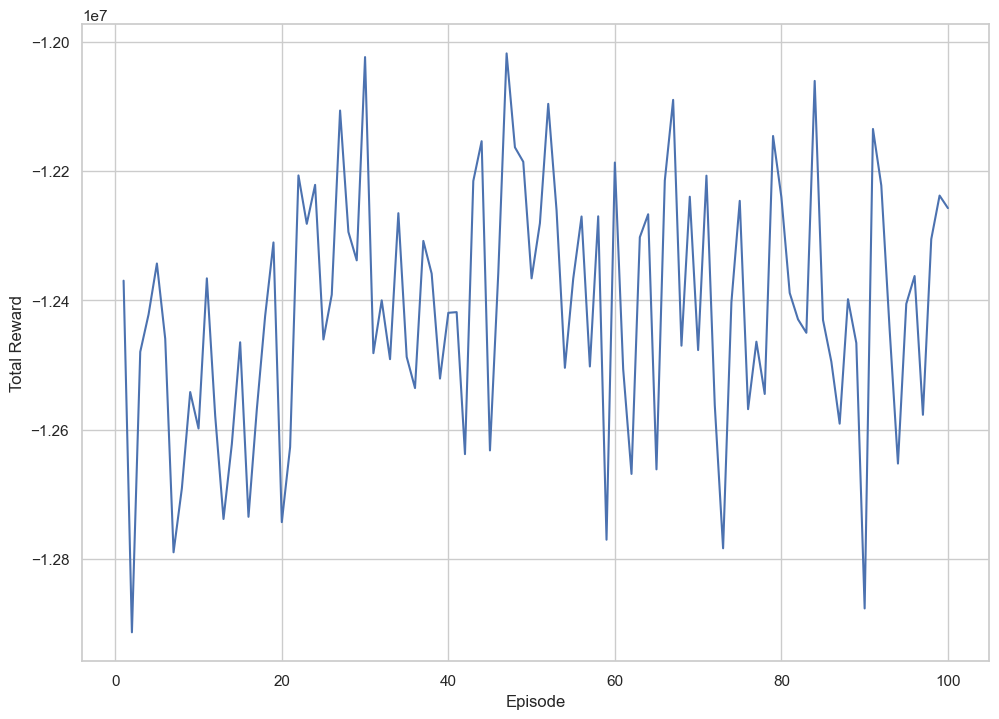

In [5]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

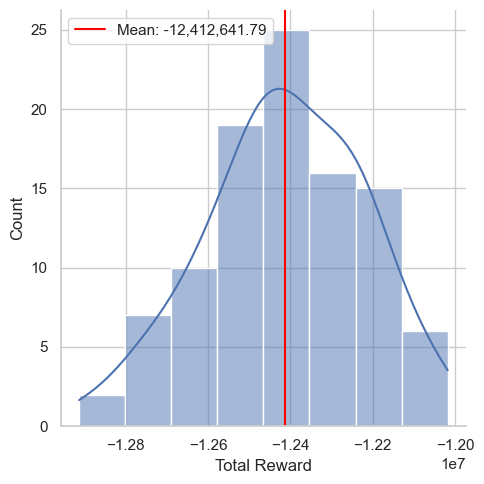

In [6]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Manual strategy 1


In [7]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []
num_episodes = 100  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price = state
        if hour == 5:
            action = 10
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()


In [8]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-553658.666667
1,2,-588028.000000
2,3,-552532.444444
3,4,-540665.777778
4,5,-563706.222222


<Axes: xlabel='Episode', ylabel='Total Reward'>

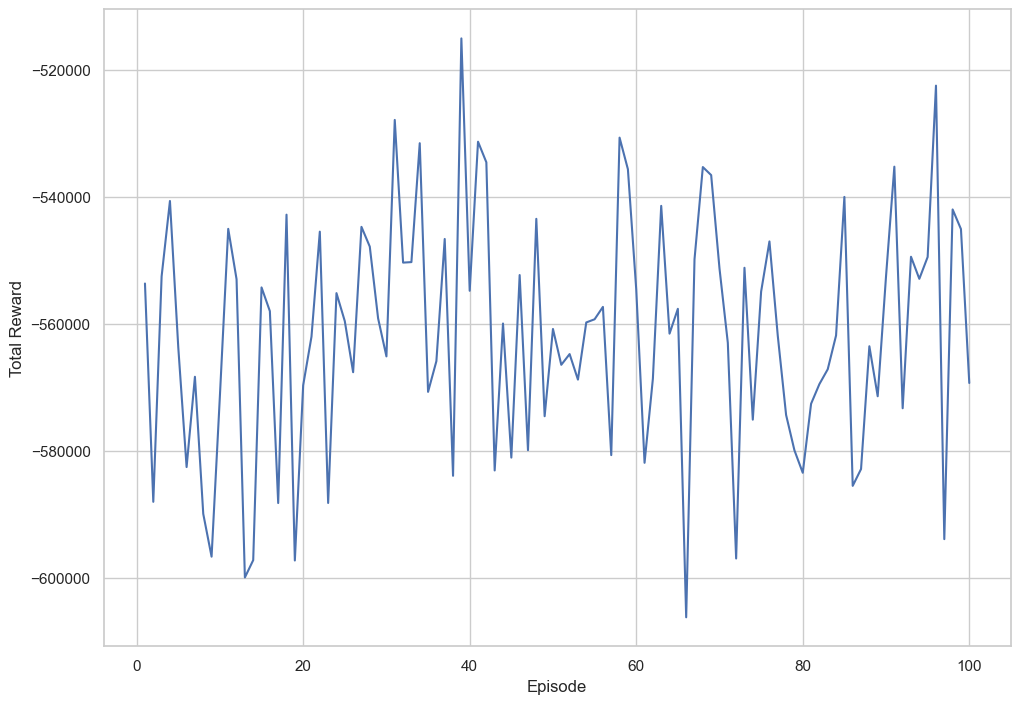

In [9]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

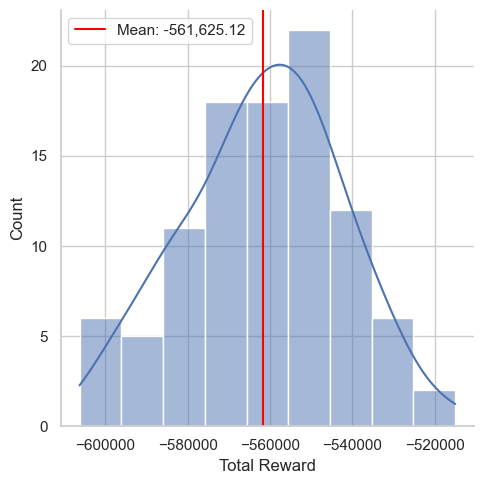

In [10]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 2


In [11]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []
num_episodes = 100  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price = state
        if hour == 5:
            action = 10
        elif hour == 11:
            action = 0
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()


In [12]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-2.044352e+06
1,2,-2.129373e+06
2,3,-2.098201e+06
3,4,-2.167046e+06
4,5,-2.098224e+06


<Axes: xlabel='Episode', ylabel='Total Reward'>

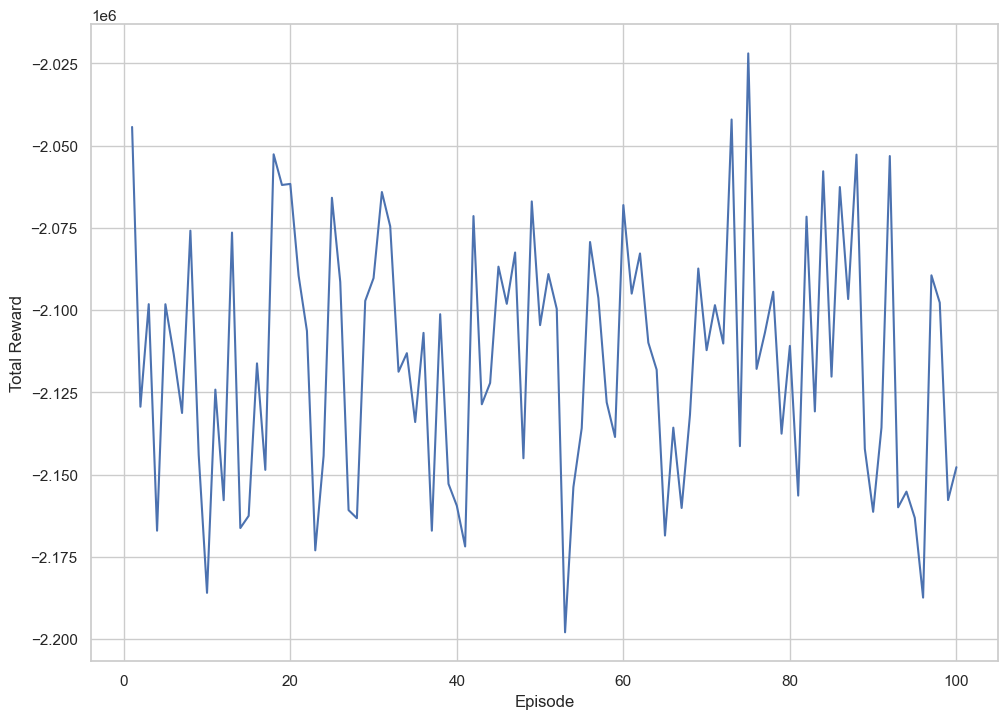

In [13]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

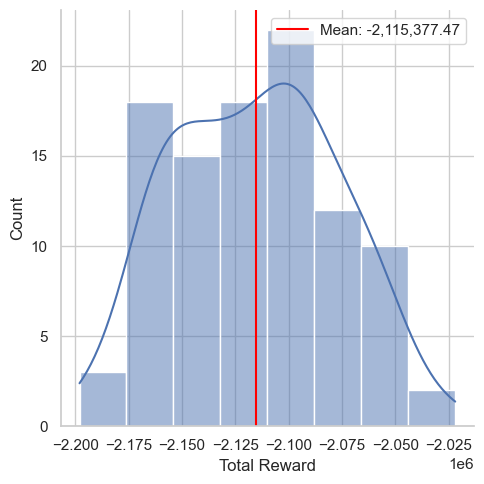

In [14]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## RL


In [15]:
# env = SmartGridBatteryEnv(train_data_melted)

# # Create the agent
# agent = QLearningAgent(env.action_space)

# # Run the training loop
# num_episodes = 1000
# for episode in range(num_episodes):
#     state = env.reset()
#     done = False

#     while not done:
#         action = agent.choose_action(state)
#         next_state, reward, done, _ = env.step(action)
#         agent.learn(state, action, reward, next_state)
#         state = next_state